In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import seaborn as sns # For Plotting Graphs
import matplotlib.pyplot as plt # for Plotting Graphs
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report, accuracy_score, f1_score  ## Skearns Metrics
from sklearn.neighbors import KNeighborsClassifier ## KNN Classifier
from sklearn.model_selection import train_test_split ## Splitting Data set
from xgboost import XGBClassifier ## Boosting Algo
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc ## Comparing Various Classifiers
import warnings # Removin Warnings
warnings.filterwarnings("ignore")

# DATASET

## Context of Data

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Loading The Dataset

In [3]:
Credit_card_fraud_csv = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv",delimiter = ",") # Reading Csv file as Pandas DataFrame.
Credit_card_fraud_csv.head() # Showing Top 5 Datapoints

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# V1,V2,V3 ... etc are PCA transform of Actual Features.
Credit_card_fraud_csv.shape

(284807, 31)

In [5]:
Credit_card_fraud_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

*Note: No Missing Data*

In [6]:
Credit_card_fraud_csv.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Visualization and Interpretation

We can see that the data is highly `Imbalanced` and this lead to high **accuracy** as mostly it predicts the majority class. In real World Secanrio we may notice that fraud to legit transaction ratio is very low. Most of the transactions are legit but we need to prevent each and every fraud transactions. In such cases we want that are *False Positive* should be ***LOW***.


With imbalanced data sets, an algorithm doesn’t get the necessary information about the minority class to make an accurate prediction. Hence, it is desirable to use ML algorithms with balanced data sets. Then, how should we deal with imbalanced datasets?

The term imbalanced refer to the disparity encountered in the dependent (response) variable. Therefore, an imbalanced classification problem is one in which the dependent variable has imbalanced proportion of classes. In other words, a data set that exhibits an unequal distribution between its classes is considered to be imbalanced.

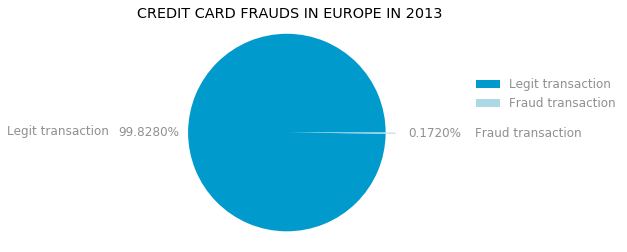

In [7]:
def Pie(ratio, text = "CREDIT CARD FRAUDS IN EUROPE IN 2013 "):    
    fig, ax = plt.subplots()
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#909090'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size']=12
    labels = ['Legit transaction', 
             'Fraud transaction']
    percentages = [1- ratio,ratio]
    explode=(0.1,0)
    ax.pie(percentages, explode=explode, labels=labels,  
           colors= ['#009ACD', '#ADD8E6'], autopct='%1.4f%%', 
           shadow=False, startangle=0,   
           pctdistance=1.4,labeldistance=1.8);
    ax.axis('equal')
    ax.set_title( text)
    ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));
Pie(ratio = 0.00172)

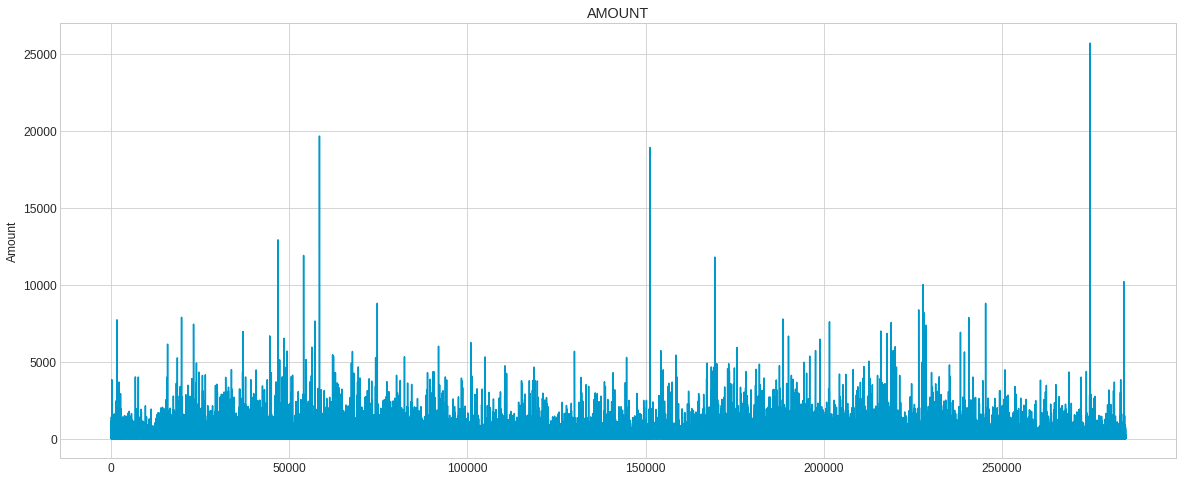

In [8]:
Amount = Credit_card_fraud_csv["Amount"]#[Credit_card_fraud_csv["Class"] == 1]
x = range(0,Amount.shape[0])
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,8)
fig = plt.figure()
ax = plt.axes()
ax.plot(x,Amount,color='#0099CC')
#plt.xlabel("")
plt.ylabel("Amount")
ax.set_title("AMOUNT");

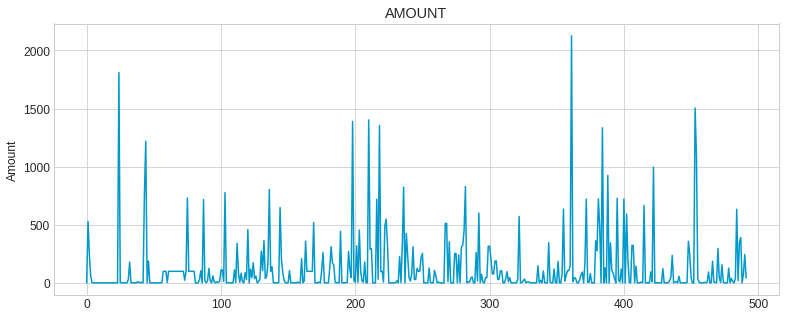

In [9]:
Fraud_Amount = Credit_card_fraud_csv[Credit_card_fraud_csv["Class"] == 1]["Amount"]
x = range(0,Fraud_Amount.shape[0])
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (13,5)
fig = plt.figure()
ax = plt.axes()
ax.plot(x,Fraud_Amount,color='#0099CC')
#plt.xlabel("")
plt.ylabel("Amount")
ax.set_title("AMOUNT");

In [10]:
Fraud_Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Scaling

*We can also see that `Time` and `Amount` are not scaled as rest of our Features*

In [11]:
from sklearn.preprocessing import  RobustScaler


rob_scaler = RobustScaler()

Sc_amount = rob_scaler.fit_transform(Credit_card_fraud_csv['Amount'].values.reshape(-1,1))
Sc_time   = rob_scaler.fit_transform(Credit_card_fraud_csv['Time'].values.reshape(-1,1))
Credit_card_fraud_csv.insert(0, 'scaled_amount', Sc_amount)
Credit_card_fraud_csv.insert(1, 'scaled_time', Sc_time)
Credit_card_fraud_csv.drop(['Time','Amount'], axis=1, inplace=True)
Credit_card_fraud_csv.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Spliting Data

We have around 500 fraud detection and rest is legit. I am going to divide it in 1:1 ratio in Train and Test

In [12]:
def concatenate(X,Y):
    return np.concatenate((X,Y))

In [13]:
legit_tranc = Credit_card_fraud_csv[Credit_card_fraud_csv["Class"] == 0]
fraud_tranc = Credit_card_fraud_csv[Credit_card_fraud_csv["Class"] == 1]
LeX, LeXte,LeT,LeTe = train_test_split(np.array(legit_tranc.iloc[:,0:-1]),np.array(legit_tranc.iloc[:,-1]),test_size  = 0.35)
FrX, FrXte,FrT,FrTe = train_test_split(np.array(fraud_tranc.iloc[:,0:-1]),np.array(fraud_tranc.iloc[:,-1]),test_size  = 0.5)
Xtrain = concatenate(LeX,FrX)
Xtest = concatenate(LeXte,FrXte)
Ytrain = concatenate(LeT,FrT)
Ytest = concatenate(LeTe,FrTe)
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape,FrX.shape

((185050, 30), (99757, 30), (185050,), (99757,), (246, 30))

## Basic Model 

In [14]:
neigh = KNeighborsClassifier(n_neighbors=1,algorithm='auto',n_jobs = 10)
neigh.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=10, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
def acc(y_test,prediction):
    # Printing Accuracy
    cm = confusion_matrix(y_test, prediction)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_test,prediction))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print("\n Accuracy Percentage  is : {}%".format(accuracy_score(Ytest,prediction) * 100))
    ax = sns.heatmap([precision,recall],linewidths= 0.5,cmap="YlGnBu")

Recall: [0.99981912 0.75609756]
Precision: [0.99939731 0.91176471]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99511
           1       0.91      0.76      0.83       246

    accuracy                           1.00     99757
   macro avg       0.96      0.88      0.91     99757
weighted avg       1.00      1.00      1.00     99757


 confussion matrix:
 [[99493    18]
 [   60   186]]

 Accuracy Percentage  is : 99.92180999829586%


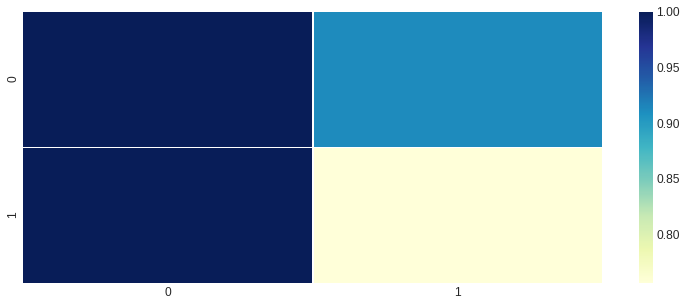

In [16]:
y_pred = neigh.predict(Xtest)
acc(Ytest,y_pred);

### Accuracy is Very High but it could not predict many frauds

# Handling Imbalanced Data

The methods are widely known as ‘Sampling Methods’. Generally, these methods aim to modify an imbalanced data into balanced distribution using some mechanism. The modification occurs by altering the size of original data set and provide the same proportion of balance.

These methods have acquired higher importance after many researches have proved that balanced data results in improved overall classification performance compared to an imbalanced data set. Hence, it’s important to learn them.

Below are the methods used to treat imbalanced datasets:

* Undersampling
* Oversampling
* Synthetic Data Generation
* Cost Sensitive Learning
 
 
*Source: Analytics Vidhya*

## UNDERSAMPLING

This method works with majority class. It reduces the number of observations from majority class to make the data set balanced. This method is best to use when the data set is huge and reducing the number of training samples helps to improve run time and storage troubles.

### Random under-sampling for the majority class

In [17]:
Xtrain_un = concatenate(LeX[:246],FrX)
Ytrain_un = concatenate(LeT[:246],FrT)
Xtrain_un.shape,Xtest.shape,Ytrain_un.shape,Ytest.shape

((492, 30), (99757, 30), (492,), (99757,))

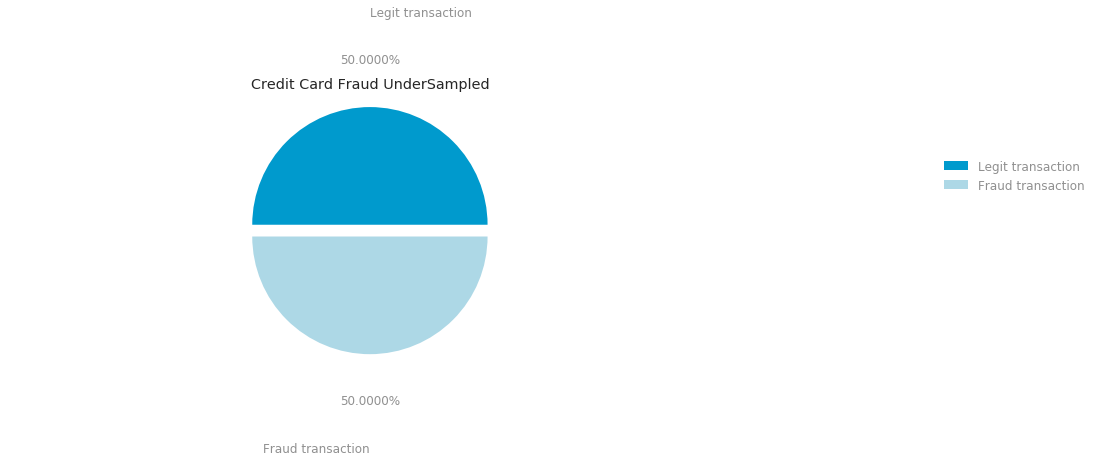

In [18]:
Pie(Ytrain_un[Ytrain_un  == 1].sum()/Ytrain_un.shape[0],text = "Credit Card Fraud UnderSampled")

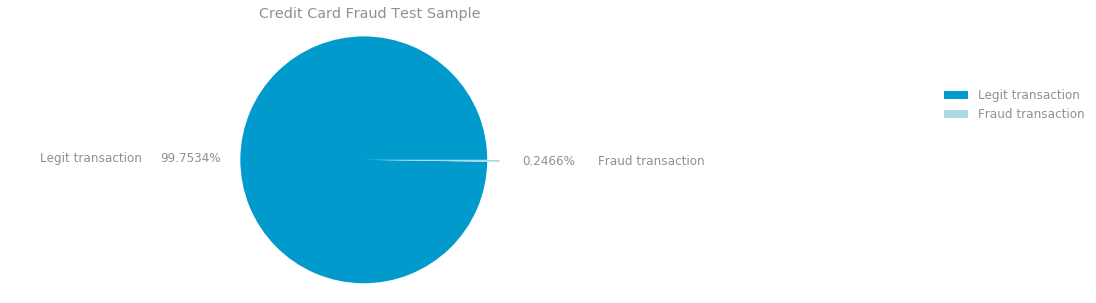

In [19]:
Pie(Ytest[Ytest == 1].sum()/Ytest.shape[0],text = "Credit Card Fraud Test Sample")

## SVC

In [20]:
def train(clf,X,Y,x,y):
    clf.fit(X,Y)
    y_pred = clf.predict(x)
    acc(y_pred,y)
    return y_pred

[LibSVM]Recall: [0.99988917 0.0247743 ]
Precision: [0.90664349 0.95934959]

 clasification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     90231
           1       0.96      0.02      0.05      9526

    accuracy                           0.91     99757
   macro avg       0.93      0.51      0.50     99757
weighted avg       0.91      0.91      0.86     99757


 confussion matrix:
 [[90221    10]
 [ 9290   236]]

 Accuracy Percentage  is : 100.0%


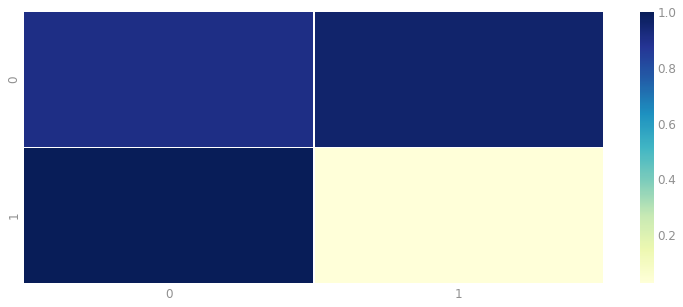

In [21]:
clf = SVC(C = 5.3, cache_size=1000, class_weight="balanced", coef0=0.0,
    decision_function_shape='ovr', gamma='auto', kernel='rbf',
    max_iter=1000,  random_state=None, 
    tol=0.001, verbose=True)
yp_UNS_svc = train(clf,Xtrain_un,Ytrain_un,Xtest,Ytest)

## KNN

Recall: [0.99969413 0.12887828]
Precision: [0.98532826 0.87804878]

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     98081
           1       0.88      0.13      0.22      1676

    accuracy                           0.99     99757
   macro avg       0.93      0.56      0.61     99757
weighted avg       0.98      0.99      0.98     99757


 confussion matrix:
 [[98051    30]
 [ 1460   216]]

 Accuracy Percentage  is : 100.0%


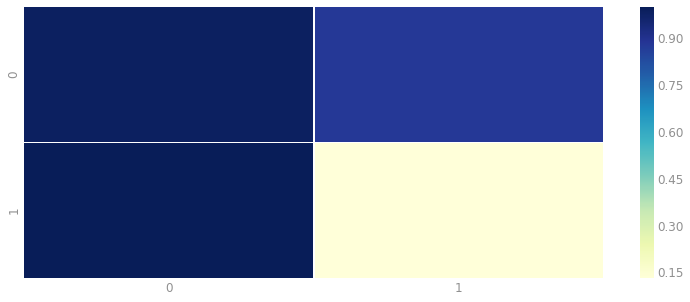

In [22]:
neigh = KNeighborsClassifier(n_neighbors=7,algorithm='auto',n_jobs = 9)
yp_un_knn = train(neigh,Xtrain_un,Ytrain_un,Xtest,Ytest)

## XGBOOST

Recall: [0.99980246 0.06351427]
Precision: [0.96636553 0.92276423]

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     96183
           1       0.92      0.06      0.12      3574

    accuracy                           0.97     99757
   macro avg       0.94      0.53      0.55     99757
weighted avg       0.96      0.97      0.95     99757


 confussion matrix:
 [[96164    19]
 [ 3347   227]]

 Accuracy Percentage  is : 100.0%


array([0, 0, 0, ..., 1, 1, 1])

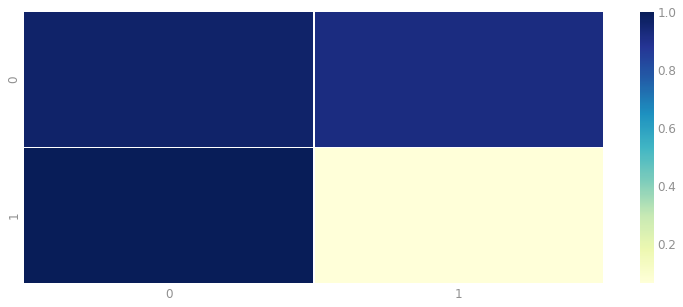

In [23]:
xgb = XGBClassifier(max_depth= 9,
                           learning_rate=0.001,
                           n_estimators=5000,
                           objective='binary:logistic',
                           gamma=0,
                           seed=1)
train(xgb,Xtrain_un,Ytrain_un,Xtest,Ytest)

## Random Forest Classifier


Recall: [0.99979396 0.08401487]
Precision: [0.97523892 0.91869919]

 clasification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     97067
           1       0.92      0.08      0.15      2690

    accuracy                           0.98     99757
   macro avg       0.95      0.54      0.57     99757
weighted avg       0.97      0.98      0.96     99757


 confussion matrix:
 [[97047    20]
 [ 2464   226]]

 Accuracy Percentage  is : 100.0%


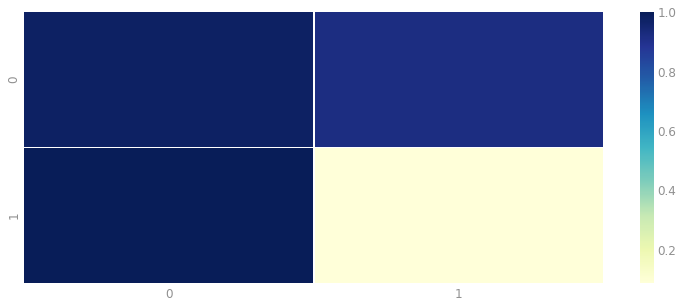

In [24]:
rndmfor = RandomForestClassifier(n_estimators=1000, max_depth=13,random_state=0)
yp_uns_rndmfrs = train(rndmfor,Xtrain_un,Ytrain_un,Xtest,Ytest)

### UNDERSAMPLING Did not worked well!

# SMOTE

Using TensorFlow backend.


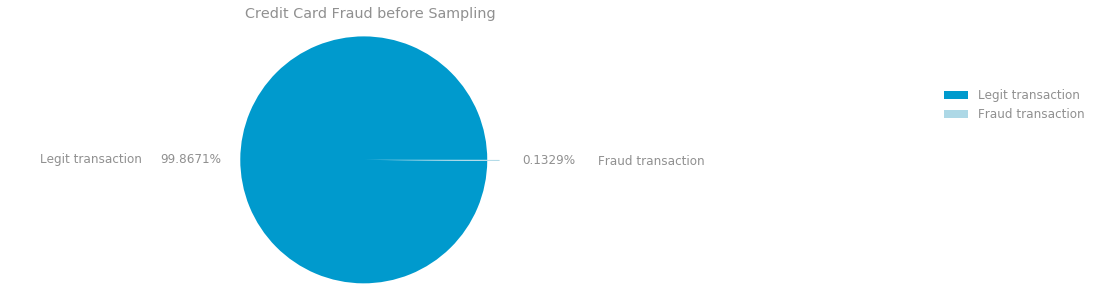

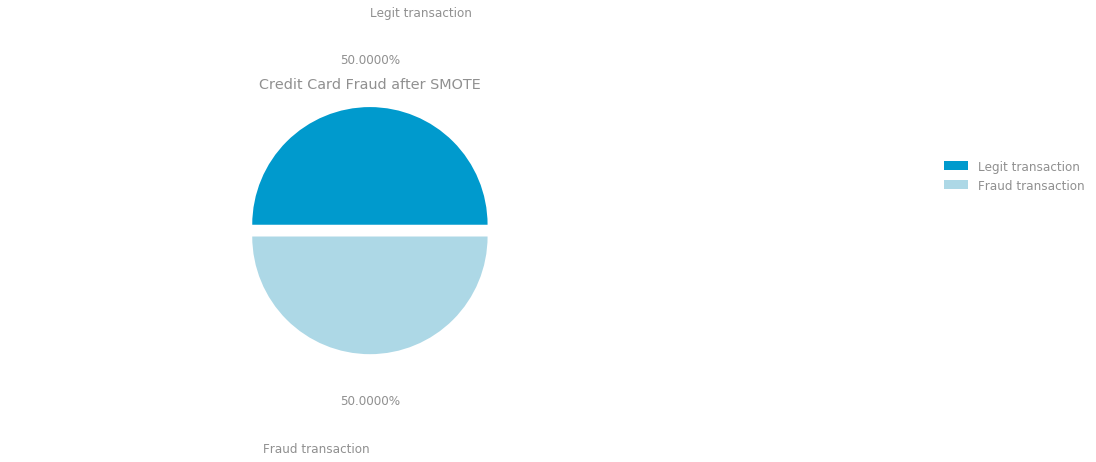

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
Pie(Ytrain[Ytrain  == 1].sum()/Ytrain.shape[0],text = "Credit Card Fraud before Sampling")
Xtrain_smote, Ytrain_smote = sm.fit_sample(Xtrain, Ytrain)
Pie(Ytrain_smote[Ytrain_smote  == 1].sum()/Ytrain_smote.shape[0],text = "Credit Card Fraud after SMOTE")

## SVC

[LibSVM]Recall: [0.99908579 0.71100917]
Precision: [0.9993669 0.6300813]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99539
           1       0.63      0.71      0.67       218

    accuracy                           1.00     99757
   macro avg       0.81      0.86      0.83     99757
weighted avg       1.00      1.00      1.00     99757


 confussion matrix:
 [[99448    91]
 [   63   155]]

 Accuracy Percentage  is : 100.0%


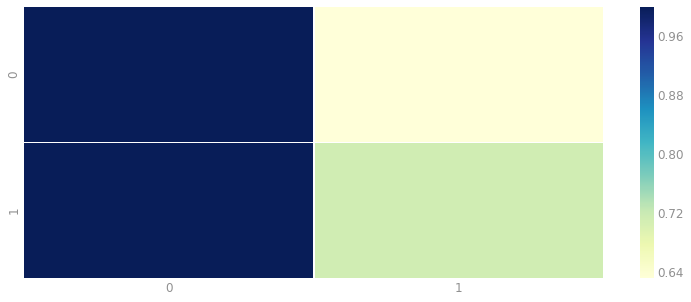

In [26]:
clf = SVC(C = 5.3, cache_size=1000, class_weight="balanced", coef0=0.0,
    decision_function_shape='ovr', gamma='auto', kernel='rbf',
    max_iter=1000,  random_state=None, 
    tol=0.001, verbose=True)
yp_SMT_svc = train(clf,Xtrain_smote, Ytrain_smote,Xtest,Ytest)

## KNN

Recall: [0.99956771 0.70731707]
Precision: [0.99915587 0.82520325]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99470
           1       0.83      0.71      0.76       287

    accuracy                           1.00     99757
   macro avg       0.91      0.85      0.88     99757
weighted avg       1.00      1.00      1.00     99757


 confussion matrix:
 [[99427    43]
 [   84   203]]

 Accuracy Percentage  is : 100.0%


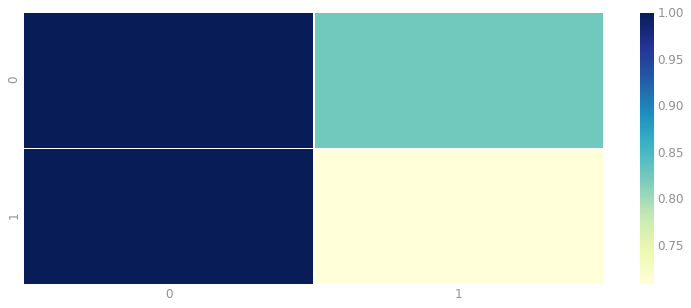

In [27]:
neigh = KNeighborsClassifier(n_neighbors=3,algorithm='auto',n_jobs = 9)
yp_sm_knn = train(neigh,Xtrain_smote, Ytrain_smote,Xtest,Ytest)

Recall: [0.99980366 0.07602143]
Precision: [0.97227442 0.92276423]

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     96771
           1       0.92      0.08      0.14      2986

    accuracy                           0.97     99757
   macro avg       0.95      0.54      0.56     99757
weighted avg       0.97      0.97      0.96     99757


 confussion matrix:
 [[96752    19]
 [ 2759   227]]

 Accuracy Percentage  is : 100.0%


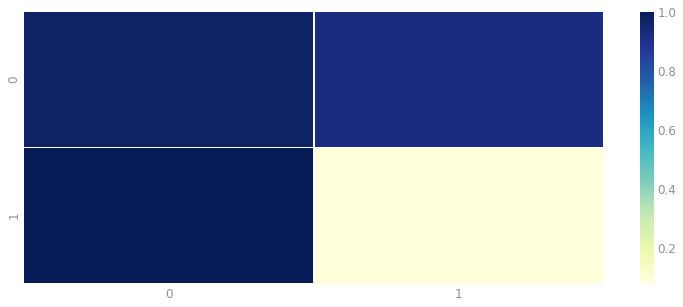

In [28]:
logreg = LogisticRegression(C = 0.1)
yp_sm_lg = train(logreg,Xtrain_smote, Ytrain_smote,Xtest,Ytest)